Dataset Overview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing Values:
 price               0
area                0
bedrooms           

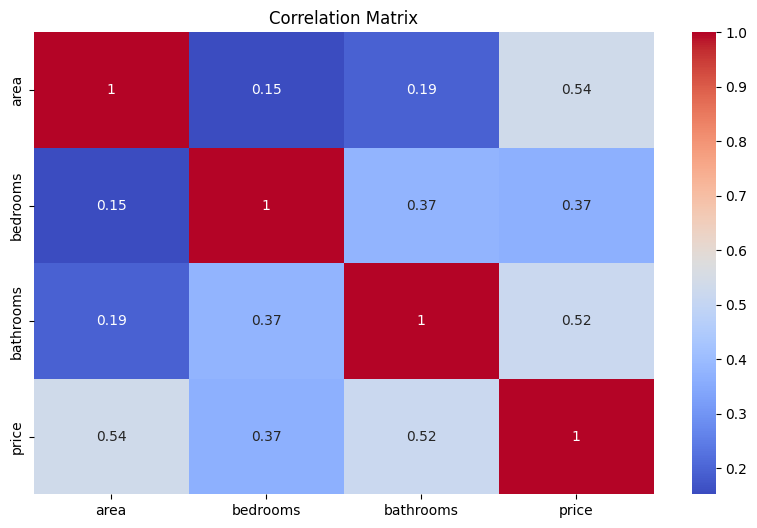

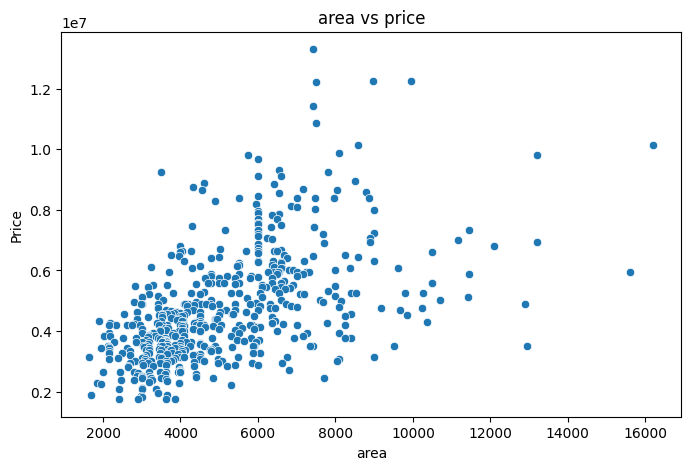

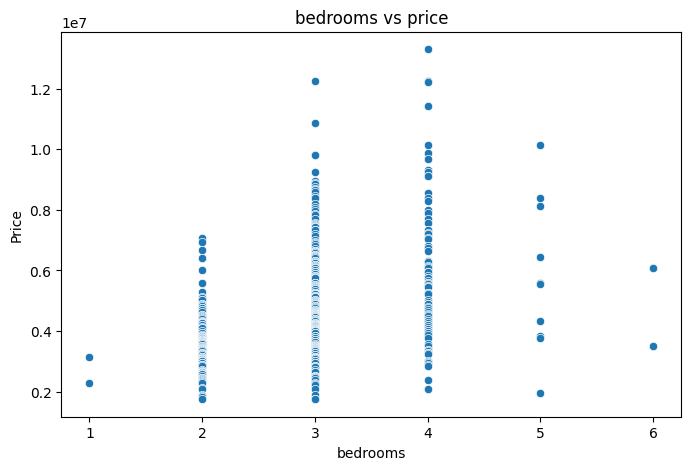

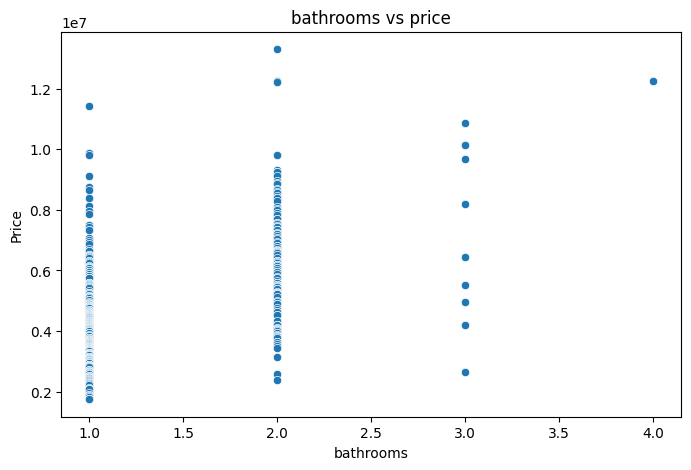

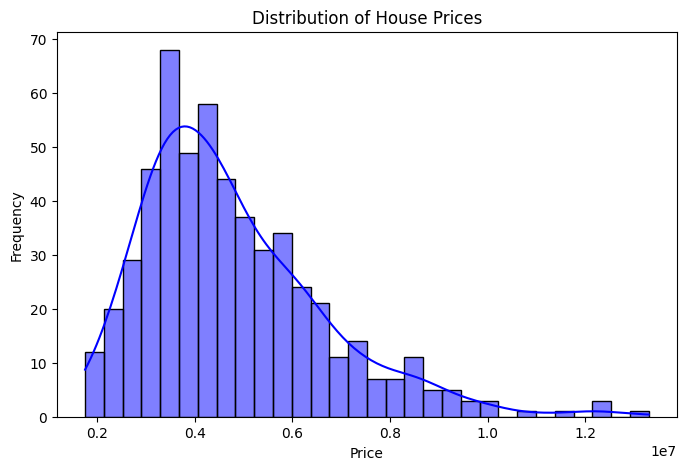


Model Evaluation:
Mean Squared Error: 2750040479309.05
R-Squared: 0.46


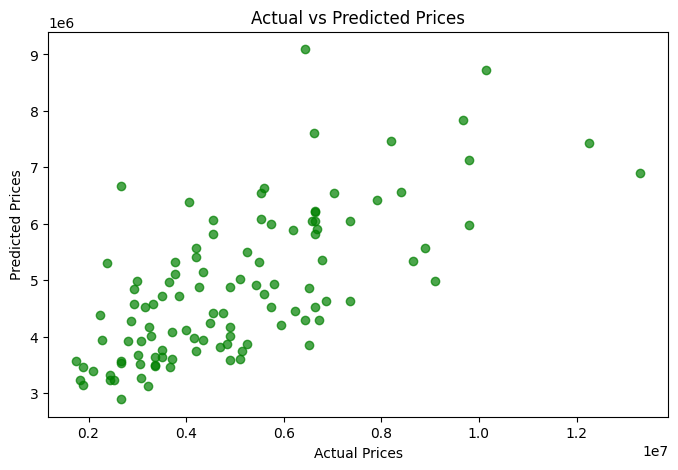


Model Coefficients:
     Feature   Coefficient
0       area  3.454666e+02
1   bedrooms  3.601977e+05
2  bathrooms  1.422320e+06


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_path = "Housing.csv"  # Replace with your actual dataset path
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Data Cleaning and Preprocessing
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Fill or drop missing values (example: dropping rows with missing values)
data = data.dropna()

# Selecting relevant features
features = ['area', 'bedrooms', 'bathrooms']
target = 'price'
data = data[features + [target]]

# Exploratory Data Analysis (EDA)
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for features vs price
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data[target], kde=True, bins=30, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Splitting the data into training and testing sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Visualizing Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Save model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
print(coefficients)
